In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [11]:
from dataloader import CustomImageDataset
modelname = 'facebook/dinov2-base'
data_dir = 'D:/CAKE/dataset'  # Đường dẫn đến thư mục chứa dữ liệu  
train_dir = os.path.join(data_dir, "train")
dev_dir = os.path.join(data_dir, "dev")
train_dataset = CustomImageDataset(root_dir=train_dir,modelname=modelname,dev = True)
dev_dataset = CustomImageDataset(root_dir=dev_dir,modelname=modelname,dev = True)

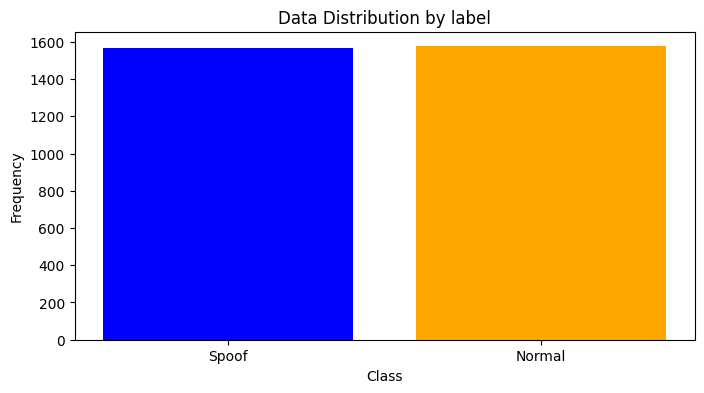

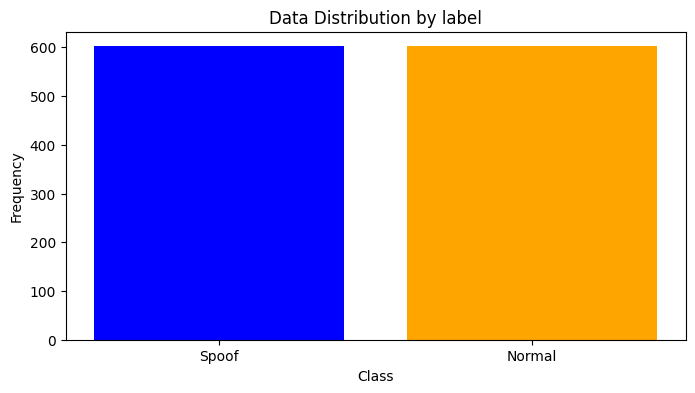

In [12]:
def visualize_frequency_distribution(dataset):
    labels = [label for _, label in dataset]
    unique_labels, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(8, 4))
    plt.bar(unique_labels, counts, color=['blue', 'orange'])
    plt.xticks(unique_labels, ['Spoof', 'Normal'])
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Data Distribution by label')
    plt.show()
visualize_frequency_distribution(train_dataset)
visualize_frequency_distribution(dev_dataset)

In [6]:
def plot_rgb_histogram(folder_dir):
    image_paths = glob.glob(folder_dir + "/*.jpg")
    hist_R = np.zeros(256, dtype=int)
    hist_G = np.zeros(256, dtype=int)       
    hist_B = np.zeros(256, dtype=int)
    for img_path in image_paths:
        try:
            # Đọc ảnh và chuyển đổi sang định dạng RGB
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            hist_R += cv2.calcHist([image], [0], None, [256], [0, 256]).flatten().astype(int)
            hist_G += cv2.calcHist([image], [1], None, [256], [0, 256]).flatten().astype(int)
            hist_B += cv2.calcHist([image], [2], None, [256], [0, 256]).flatten().astype(int)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue
    plt.figure(figsize=(15, 5))
    colors = ['red', 'green', 'blue']
    for i, (hist, color) in enumerate(zip([hist_R, hist_G, hist_B], colors)):
        plt.subplot(1, 3, i+1)
        plt.bar(np.arange(256), hist, color=color, alpha=0.7)
        plt.title(f'Histogram of {color.upper()} channel')
        plt.xlabel('Pixel value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Normal directory: D:/CAKE/dataset\train\normal


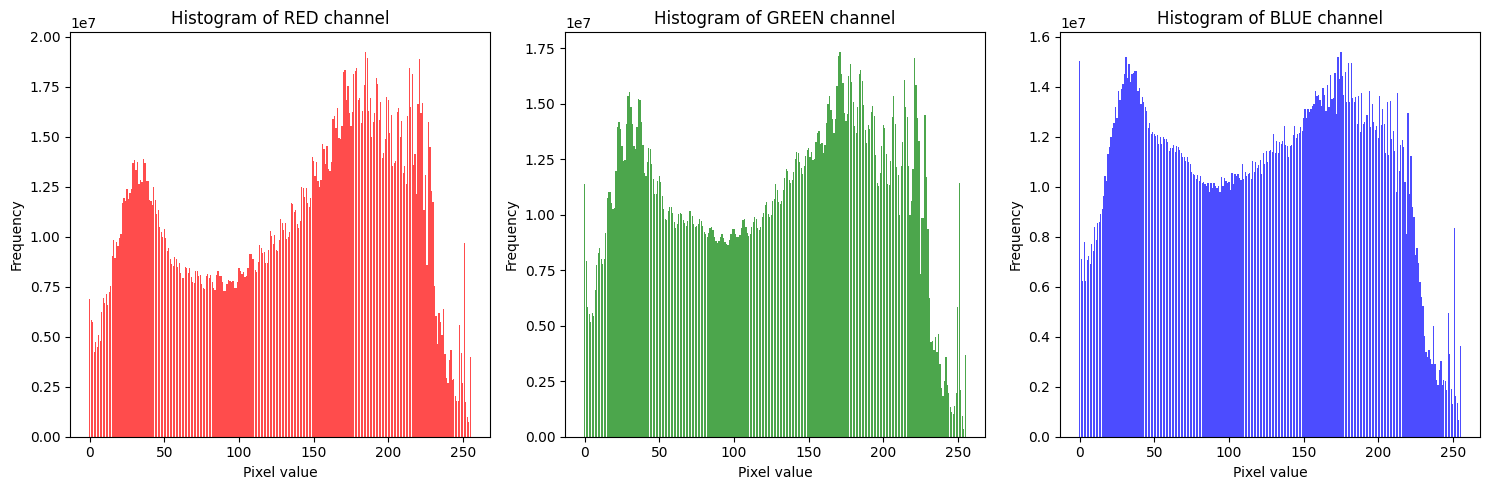

Spoof directory: D:/CAKE/dataset\train\spoof


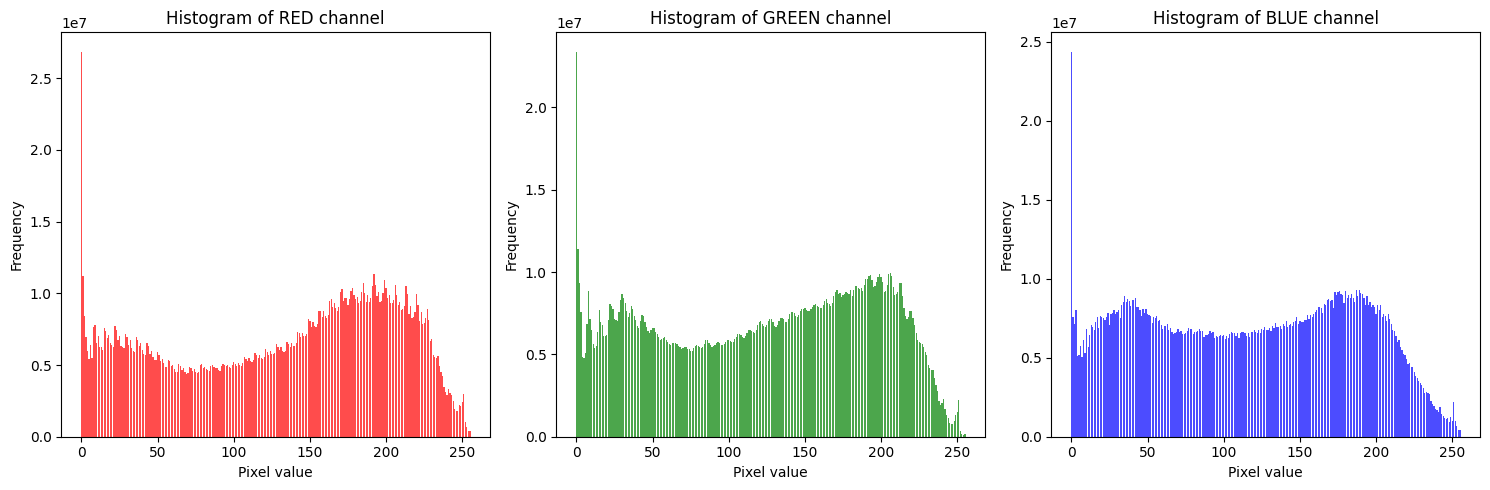

In [7]:
normal_dir = os.path.join(train_dir, "normal")
spoof_dir = os.path.join(train_dir, "spoof")
print("Normal directory:", normal_dir)
plot_rgb_histogram(normal_dir)
print("Spoof directory:", spoof_dir)
plot_rgb_histogram(spoof_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4831376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6384109..2.2391288].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5280112..2.3611329].


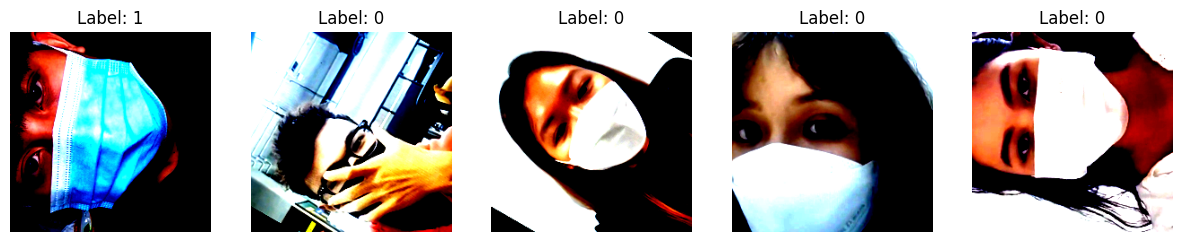

In [22]:
# Visualize một số ảnh trong tập huấn luyện
import matplotlib.pyplot as plt
import random   
def visualize_samples(dataset, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        img, label = dataset[idx]
        img = img.squeeze().permute(1, 2, 0).numpy()
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()
visualize_samples(train_dataset, num_samples=5)

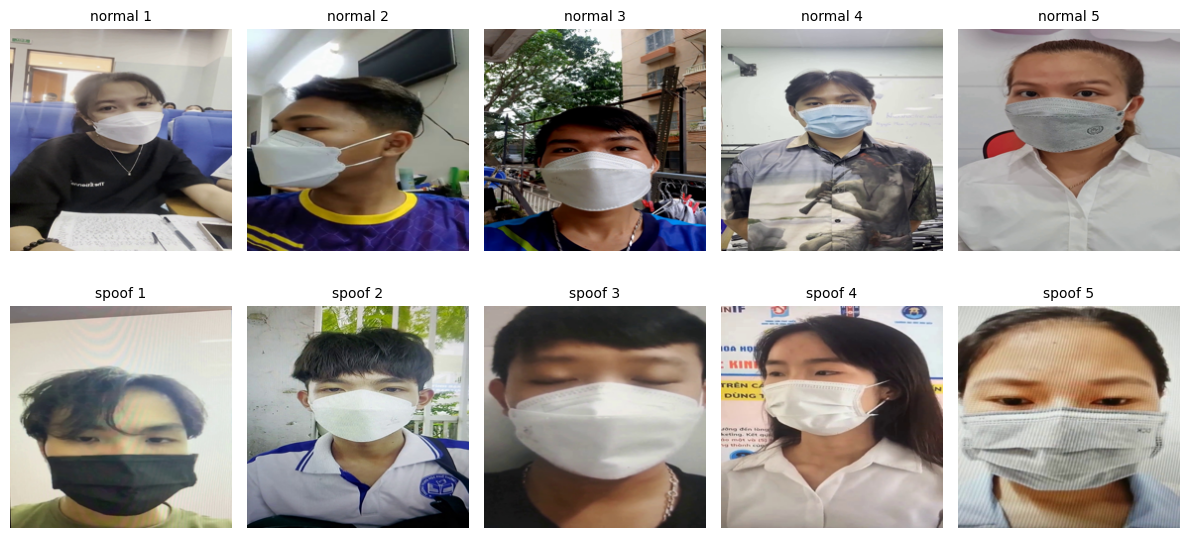

In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

data_dir = 'D:/CAKE/dataset'  # Đường dẫn đến thư mục chứa dữ liệu  
train_dir = os.path.join(data_dir, "train")
# Đường dẫn đến thư mục train chứa hai thư mục con normal và spoof
normal_dir = os.path.join(train_dir, "normal")
spoof_dir = os.path.join(train_dir, "spoof")

# Lấy danh sách các file ảnh trong mỗi thư mục
normal_images = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
spoof_images = [os.path.join(spoof_dir, f) for f in os.listdir(spoof_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Chọn ngẫu nhiên 5 ảnh từ mỗi thư mục
random_normal = random.sample(normal_images, 5)
random_spoof = random.sample(spoof_images, 5)

# Hàm để resize ảnh về kích thước 224x224
def load_and_resize_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    return np.array(img)

# Thiết lập figure để hiển thị 10 ảnh
plt.figure(figsize=(12, 6))

# Hiển thị 5 ảnh normal
for i, img_path in enumerate(random_normal):
    plt.subplot(2, 5, i + 1)
    img = load_and_resize_image(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"normal {i+1}", fontsize=10)

# Hiển thị 5 ảnh spoof
for i, img_path in enumerate(random_spoof):
    plt.subplot(2, 5, i + 6)
    img = load_and_resize_image(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"spoof {i+1}", fontsize=10)

plt.tight_layout()
plt.show()